# Week 5 Videos

## Unpacking

<iframe width="560" height="315" src="https://www.youtube.com/embed/tRqrC2tR9c4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

* Warm-up task: Define `ncol` to be the number of columns in the Spotify dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/spotify_dataset.csv", na_values=" ").dropna()

In [3]:
t = df.shape

In [4]:
t[1]

23

In [5]:
_, ncol = df.shape

In [6]:
ncol

23

In [7]:
_

1545

In [8]:
import matplotlib.pyplot as plt

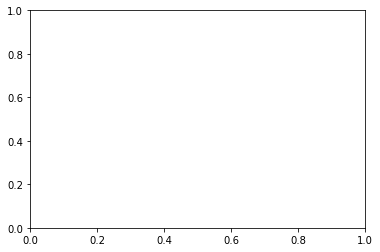

In [9]:
t = plt.subplots()

In [10]:
type(t)

tuple

In [11]:
type(t[0])

matplotlib.figure.Figure

In [12]:
type(t[1])

matplotlib.axes._subplots.AxesSubplot

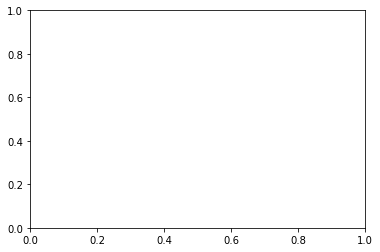

In [13]:
# tuple unpacking
fig, ax = plt.subplots()

In [14]:
type(fig)

matplotlib.figure.Figure

In [15]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [16]:
for a,b in df.groupby("Artist"):
    print(a)
    display(b)
    break

*NSYNC


Index  Highest Charting Position  Number of Times Charted  \
690    691                        184                        1   

    Week of Highest Charting                        Song Name    Streams  \
690   2020-12-18--2020-12-25  Merry Christmas, Happy Holidays  6,635,128   

     Artist  Artist Followers                 Song ID  \
690  *NSYNC         1564750.0  4v9WbaxW8HdjqfUiWYWsII   

                                                 Genre  ... Danceability  \
690  ['boy band', 'dance pop', 'pop', 'post-teen pop']  ...        0.643   

    Energy  Loudness  Speechiness  Acousticness  Liveness    Tempo  \
690  0.939    -3.967       0.0463         0.104     0.881  104.999   

     Duration (ms)  Valence  Chord  
690       255307.0    0.756      F  

[1 rows x 23 columns]

## Generating data for linear regression

<iframe width="560" height="315" src="https://www.youtube.com/embed/jwkBTZ0ZD7I" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [17]:
from sklearn.datasets import make_regression

In [18]:
help(make_regression)

Help on function make_regression in module sklearn.datasets._samples_generator:

make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
    Generate a random regression problem.
    
    The input set can either be well conditioned (by default) or have a low
    rank-fat tail singular profile. See :func:`make_low_rank_matrix` for
    more details.
    
    The output is generated by applying a (potentially biased) random linear
    regression model with `n_informative` nonzero regressors to the previously
    generated input and some gaussian centered noise with some adjustable
    scale.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, default=100
        The number of samples.
    
    n_features : int, default=100
        The number of features.
    
    n_informative : int, default

In [19]:
t = make_regression(n_features=1)

In [20]:
type(t)

tuple

In [21]:
len(t)

2

In [22]:
type(t[0])

numpy.ndarray

In [23]:
t[0].shape

(100, 1)

In [24]:
type(t[1])

numpy.ndarray

In [25]:
t[1].shape

(100,)

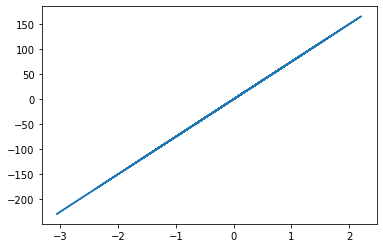

In [26]:
fig, ax = plt.subplots()
ax.plot(t[0], t[1])

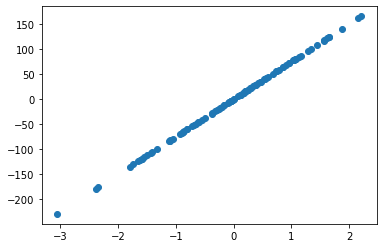

In [27]:
fig, ax = plt.subplots()
ax.scatter(t[0], t[1])

In [28]:
X,y = make_regression(n_samples = 10, n_features=1, coef=True)

ValueError: too many values to unpack (expected 2)

In [29]:
X,y,m = make_regression(n_samples = 10, n_features=1, coef=True)

In [30]:
m

array(91.1887982)

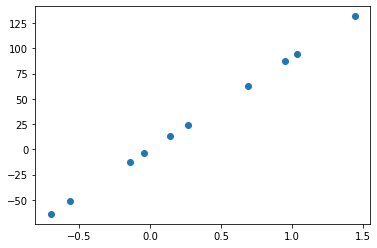

In [31]:
fig, ax = plt.subplots()
ax.scatter(X,y)

## Linear regression using scikit-learn

<iframe width="560" height="315" src="https://www.youtube.com/embed/3fkDEuBBOf8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [32]:
X,y,m = make_regression(n_samples = 10, n_features=1, coef=True, noise=5, bias=-17.4)

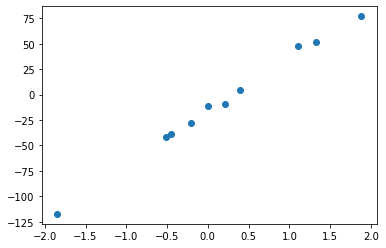

In [33]:
fig, ax = plt.subplots()
ax.scatter(X,y)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()

In [36]:
type(reg)

sklearn.linear_model._base.LinearRegression

In [37]:
reg.fit(X,y)

LinearRegression()

In [38]:
reg.coef_

array([52.40612222])

In [39]:
m

array(51.99661473)

In [40]:
reg.intercept_

-16.350110919609264

In [41]:
pred = reg.predict(X)

In [42]:
pred

array([  53.38680863,   82.26016741,   41.48790619,  -16.20458593,
        -40.30672273,    4.31448364,  -27.24709531,   -5.45365952,
       -113.38005912,  -43.29718554])

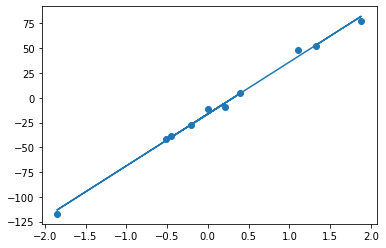

In [43]:
fig, ax = plt.subplots()
ax.scatter(X,y)
ax.plot(X,pred)

## Linear regression with a real dataset

<iframe width="560" height="315" src="https://www.youtube.com/embed/6IA0IbYsslg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

* Find the line of best fit for "Acousticness" vs "Energy" from the Spotify dataset.

In [45]:
df = pd.read_csv("../data/spotify_dataset.csv", na_values=" ").dropna()

In [46]:
import altair as alt

In [47]:
alt.Chart(df).mark_circle().encode(
    x="Acousticness",
    y="Energy"
)

alt.Chart(...)

In [48]:
reg = LinearRegression()

In [49]:
reg.fit(df["Acousticness"],df["Energy"])

ValueError: Expected 2D array, got 1D array instead:
array=[0.127  0.0383 0.335  ... 0.184  0.249  0.433 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
df["Acousticness"]

0       0.12700
1       0.03830
2       0.33500
3       0.04690
4       0.02030
         ...   
1551    0.00261
1552    0.24000
1553    0.18400
1554    0.24900
1555    0.43300
Name: Acousticness, Length: 1545, dtype: float64

In [51]:
df[["Acousticness"]]

Acousticness
0          0.12700
1          0.03830
2          0.33500
3          0.04690
4          0.02030
...            ...
1551       0.00261
1552       0.24000
1553       0.18400
1554       0.24900
1555       0.43300

[1545 rows x 1 columns]

In [52]:
reg.fit(df[["Acousticness"]],df["Energy"])

LinearRegression()

In [53]:
reg.intercept_

0.7205632317364903

In [54]:
reg.coef_

array([-0.35010056])

Predict $y = -0.35\cdot x + 0.72$.